# Statistical and Visualization Functions: Thicket Tutorial

Thicket is a python-based toolkit for Exploratory Data Analysis (EDA) of parallel performance data that enables performance optimization and understanding of applications’ performance on supercomputers. It bridges the performance tool gap between being able to consider only a single instance of a simulation run (e.g., single platform, single measurement tool, or single scale) and finding actionable insights in multi-dimensional, multi-scale, multi-architecture, and multi-tool performance datasets.

**NOTE: An interactive version of this notebook is available in the Binder environment.**

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/llnl/thicket-tutorial/develop)

***

## 1. Import Necessary Packages

To explore the structure and various capabilities of thicket components, we begin by importing necessary packages. 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from IPython.display import display
from IPython.display import HTML
import hatchet as ht

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

<IPython.core.display.Javascript object>

## 2. Read in Performance Profiles

For this notebook, we select profiles generated on Lawrence Livermore National Lab (LLNL) machine, lassen. We create two thicket objects, one generated with the same problem size of 1048576 and the other generated with different problem sizes (1048576 and 4194304).   

In [2]:
clang = "../data/quartz/Clang_900_BaseSeq_O3_08388608/"
gcc = "../data/quartz/GCC_831_BaseSeq_O3_08388608/"

# create thickets for each dataset originating from clang and gcc compilers
clang_th = th.Thicket.from_caliperreader(clang)
gcc_th = th.Thicket.from_caliperreader(gcc)

## 3. More Information on a Function

You can use the `help()` method within Python to see the information for a given object. You can do this by typing `help(object)`. 
This will allow you to see the arguments for the function, and what will be returned. An example is below.

In [3]:
help(th.median)

Help on function median in module thicket.stats.median:

median(thicket, columns=None)
    Calculate the median for each node in the performance data table.
    
    Designed to take in a thicket, and append one or more columns to the
    aggregated statistics table for the median calculation for each node.
    
    Arguments:
        thicket (thicket): Thicket object
        columns (list): List of hardware/timing metrics to perform median calculation
            on. Note, if using a columnar joined thicket a list of tuples must be passed
            in with the format (column index, column name).



## 4. Creating a Combined Thicket

To demonstrate the functions on both a thicket and a combined thicket, we create a combined thicket.

In [4]:
combined_th = th.Thicket.columnar_join([clang_th, gcc_th], ["Clang", "GCC"])
combined_th.dataframe.head(5)

Clang               \
                                                   nid         time   
node                                     profile                      
{'name': 'Base_Seq', 'type': 'function'} 0           1  1816.892754   
                                         1           1  1807.026719   
                                         2           1  1795.491419   
                                         3           1  1805.198708   
                                         4           1  1807.504658   

                                                                         \
                                                 time (exc) ProblemSize   
node                                     profile                          
{'name': 'Base_Seq', 'type': 'function'} 0         0.007212   8388608.0   
                                         1         0.007288   8388608.0   
                                         2         0.007088   8388608.0   
                                         3         0.006911   8388608.0   
                                         4         0.007204   8388608.0   

                                                                        \
                                                   Reps Iterations/Rep   
node                                     profile                         
{'name': 'Base_Seq', 'type': 'function'} 0        500.0      8388608.0   
                                         1        500.0      8388608.0   
                                         2        500.0      8388608.0   
                                         3        500.0      8388608.0   
                                         4        500.0      8388608.0   

                                                                           \
                                                    Bytes/Rep Kernels/Rep   
node                                     profile                            
{'name': 'Base_Seq', 'type': 'function'} 0        201326592.0         1.0   
                                         1        201326592.0         1.0   
                                         2        201326592.0         1.0   
                                         3        201326592.0         1.0   
                                         4        201326592.0         1.0   

                                                              \
                                                   Flops/Rep   
node                                     profile               
{'name': 'Base_Seq', 'type': 'function'} 0        16777216.0   
                                         1        16777216.0   
                                         2        16777216.0   
                                         3        16777216.0   
                                         4        16777216.0   

                                                                    \
                                                 Branch mispredict   
node                                     profile                     
{'name': 'Base_Seq', 'type': 'function'} 0                0.979491   
                                         1                0.975355   
                                         2                0.966137   
                                         3                0.969197   
                                         4                0.968343   

                                                                 \
                                                 Machine clears   
node                                     profile                  
{'name': 'Base_Seq', 'type': 'function'} 0             0.020509   
                                         1             0.024645   
                                         2             0.033863   
                                         3             0.030803   
                                         4             0.031657   

                                                          

**NOTE**
- Single indexed statistical functions append columns to the right.
- Columnar joined thickets are ordered in alphabetical order by column index and also by the columns underneath a column index. 

## 5. Aggregated Statistic Functions

###  5.1 Maximum
The `maximum` function will determine the maximum value for each node in the performance data table. In other terms, the maximum is the highest observation for a node and its associated profiles. <br>

The maximum value will be appended to the aggregated statistics table and will be denoted with `_max` at the end of column name i.e. `column_max`.

**Single Index Thicket Example**

In [5]:
# define metrics to calculate the maximum on
metrics = ["time (exc)", "Machine clears"]

In [6]:
th.maximum(clang_th, columns=metrics)
# view the first 5 entries of the aggregated statistics table
clang_th.statsframe.dataframe.head(5)

/opt/conda/lib/python3.9/site-packages/thicket/stats/maximum.py:38: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  for node in pd.unique(thicket.dataframe.reset_index()["node"].tolist()):
/opt/conda/lib/python3.9/site-packages/thicket/stats/maximum.py:38: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  for node in pd.unique(thicket.dataframe.reset_index()["node"].tolist()):


,name,time (exc)_max,Machine clears_max
node,,,
"{'name': 'Base_Seq', 'type': 'function'}",Base_Seq,0.007418,0.044086
"{'name': 'Algorithm', 'type': 'function'}",Algorithm,0.000637,0.045977
"{'name': 'Algorithm_MEMCPY', 'type': 'function'}",Algorithm_MEMCPY,0.000252,1.000000
"{'name': 'Algorithm_MEMCPY.default', 'type': 'function'}",Algorithm_MEMCPY.default,1.343627,0.998909
"{'name': 'Algorithm_MEMCPY.library', 'type': 'function'}",Algorithm_MEMCPY.library,0.756431,0.973024


**Multi-Indexed Thicket Example**

Example demonstrates how to pass a columnar joined thicket object. When passing a columnar joined thicket object, the columns argument will now take a list of tuples. Each tuple will consist of two elements. The first element will always be the column index, and the second element will be an associated column under the column index you passed.<br>

 - Example: (column_index, column_name) -> ("GCC", "Machine clears")

In [7]:
metrics = [("Clang", "time (exc)"), ("GCC", "Machine clears")]

In [8]:
th.maximum(combined_th, columns=metrics)
combined_th.statsframe.dataframe.head(5)

/opt/conda/lib/python3.9/site-packages/thicket/stats/maximum.py:45: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  for node in pd.unique(thicket.dataframe.reset_index()["node"].tolist()):
/opt/conda/lib/python3.9/site-packages/thicket/stats/maximum.py:45: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  for node in pd.unique(thicket.dataframe.reset_index()["node"].tolist()):


,,Clang,GCC
,name,time (exc)_max,Machine clears_max
node,,,
"{'name': 'Base_Seq', 'type': 'function'}",Base_Seq,0.007418,0.034919
"{'name': 'Algorithm', 'type': 'function'}",Algorithm,0.000637,0.078947
"{'name': 'Algorithm_MEMCPY', 'type': 'function'}",Algorithm_MEMCPY,0.000252,1.000000
"{'name': 'Algorithm_MEMCPY.default', 'type': 'function'}",Algorithm_MEMCPY.default,1.343627,0.998832
"{'name': 'Algorithm_MEMCPY.library', 'type': 'function'}",Algorithm_MEMCPY.library,0.756431,0.978771


### 5.2 Minimum

The `minimum` function will determine the minimum value for each node in the performance data table. In other terms, the minimum is the lowest observation for a node and its associated profiles. <br>

The minimum value will be appended to the aggregated statistics table and will be denoted with `_min` at the end of column name i.e. `column_min`.

**Single Index Thicket Example**

In [9]:
metrics = ["time (exc)", "Machine clears"]

In [10]:
th.minimum(clang_th, columns=metrics)
clang_th.statsframe.dataframe.head(5)

/opt/conda/lib/python3.9/site-packages/thicket/stats/minimum.py:38: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  for node in pd.unique(thicket.dataframe.reset_index()["node"].tolist()):
/opt/conda/lib/python3.9/site-packages/thicket/stats/minimum.py:38: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  for node in pd.unique(thicket.dataframe.reset_index()["node"].tolist()):


,name,time (exc)_max,Machine clears_max,time (exc)_min,Machine clears_min
node,,,,,
"{'name': 'Base_Seq', 'type': 'function'}",Base_Seq,0.007418,0.044086,0.006875,0.015849
"{'name': 'Algorithm', 'type': 'function'}",Algorithm,0.000637,0.045977,0.000564,0.004092
"{'name': 'Algorithm_MEMCPY', 'type': 'function'}",Algorithm_MEMCPY,0.000252,1.000000,0.000215,0.000000
"{'name': 'Algorithm_MEMCPY.default', 'type': 'function'}",Algorithm_MEMCPY.default,1.343627,0.998909,1.275210,0.987818
"{'name': 'Algorithm_MEMCPY.library', 'type': 'function'}",Algorithm_MEMCPY.library,0.756431,0.973024,0.722036,0.906853


**Multi-Indexed Thicket Example**

Example will show how to pass a columnar joined thicket object. When passing a columnar joined thicket object, the columns argument will now take a list of tuples. Each tuple will consist of two elements. The first element will always be the column index, and the second element will be an associated column under the column index you passed.<br>

 - Example: (column_index, column_name) -> ("GCC", "Machine clears")

In [11]:
metrics = [("Clang", "time (exc)"), ("GCC", "Machine clears")]

In [12]:
th.minimum(combined_th, columns=metrics)
combined_th.statsframe.dataframe.head(5)

/opt/conda/lib/python3.9/site-packages/thicket/stats/minimum.py:45: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  for node in pd.unique(thicket.dataframe.reset_index()["node"].tolist()):
/opt/conda/lib/python3.9/site-packages/thicket/stats/minimum.py:45: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  for node in pd.unique(thicket.dataframe.reset_index()["node"].tolist()):


\
                                                                        name   
node                                                                           
{'name': 'Base_Seq', 'type': 'function'}                            Base_Seq   
{'name': 'Algorithm', 'type': 'function'}                          Algorithm   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}            Algorithm_MEMCPY   
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...  Algorithm_MEMCPY.default   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...  Algorithm_MEMCPY.library   

                                                            Clang  \
                                                   time (exc)_max   
node                                                                
{'name': 'Base_Seq', 'type': 'function'}                 0.007418   
{'name': 'Algorithm', 'type': 'function'}                0.000637   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}         0.000252   
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...       1.343627   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...       0.756431   

                                                                   \
                                                   time (exc)_min   
node                                                                
{'name': 'Base_Seq', 'type': 'function'}                 0.006875   
{'name': 'Algorithm', 'type': 'function'}                0.000564   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}         0.000215   
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...       1.275210   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...       0.722036   

                                                                  GCC  \
                                                   Machine clears_max   
node                                                                    
{'name': 'Base_Seq', 'type': 'function'}                     0.034919   
{'name': 'Algorithm', 'type': 'function'}                    0.078947   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}             1.000000   
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...           0.998832   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...           0.978771   

                                                                       
                                                   Machine clears_min  
node                                                                   
{'name': 'Base_Seq', 'type': 'function'}                     0.014810  
{'name': 'Algorithm', 'type': 'function'}                    0.000000  
{'name': 'Algorithm_MEMCPY', 'type': 'function'}             0.000000  
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...           0.993177  
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...           0.905950

### 5.3 Median

The `median` function will determine the median for each node in the performance data table. <br>

The median value will be appended to the aggregated statistics table and will be denoted with `_median` at the end of column name i.e. `column_median`.

**Single Index Thicket Example**

In [13]:
metrics = ["time (exc)", "Machine clears"]

In [14]:
th.median(clang_th, columns=metrics)
clang_th.statsframe.dataframe.head(5)

/opt/conda/lib/python3.9/site-packages/thicket/stats/median.py:37: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  for node in pd.unique(thicket.dataframe.reset_index()["node"].tolist()):
/opt/conda/lib/python3.9/site-packages/thicket/stats/median.py:37: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  for node in pd.unique(thicket.dataframe.reset_index()["node"].tolist()):


,name,time (exc)_max,Machine clears_max,time (exc)_min,Machine clears_min,time (exc)_median,Machine clears_median
node,,,,,,,
"{'name': 'Base_Seq', 'type': 'function'}",Base_Seq,0.007418,0.044086,0.006875,0.015849,0.007194,0.027724
"{'name': 'Algorithm', 'type': 'function'}",Algorithm,0.000637,0.045977,0.000564,0.004092,0.000598,0.012778
"{'name': 'Algorithm_MEMCPY', 'type': 'function'}",Algorithm_MEMCPY,0.000252,1.000000,0.000215,0.000000,0.000231,NaN
"{'name': 'Algorithm_MEMCPY.default', 'type': 'function'}",Algorithm_MEMCPY.default,1.343627,0.998909,1.275210,0.987818,1.294030,0.998147
"{'name': 'Algorithm_MEMCPY.library', 'type': 'function'}",Algorithm_MEMCPY.library,0.756431,0.973024,0.722036,0.906853,0.736833,0.953007


**Multi-Indexed Thicket Example**

Example will show how to pass a columnar joined thicket object. When passing a columnar joined thicket object, the columns argument will now take a list of tuples. Each tuple will consist of two elements. The first element will always be the column index, and the second element will be an associated column under the column index you passed.<br>

 - Example: (column_index, column_name) -> ("GCC", "Machine clears") 

In [15]:
metrics = [("Clang", "time (exc)"), ("GCC", "Machine clears")]

In [16]:
th.median(combined_th, columns=metrics)
combined_th.statsframe.dataframe.head(5)

/opt/conda/lib/python3.9/site-packages/thicket/stats/median.py:44: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  for node in pd.unique(thicket.dataframe.reset_index()["node"].tolist()):
/opt/conda/lib/python3.9/site-packages/thicket/stats/median.py:44: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  for node in pd.unique(thicket.dataframe.reset_index()["node"].tolist()):


\
                                                                        name   
node                                                                           
{'name': 'Base_Seq', 'type': 'function'}                            Base_Seq   
{'name': 'Algorithm', 'type': 'function'}                          Algorithm   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}            Algorithm_MEMCPY   
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...  Algorithm_MEMCPY.default   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...  Algorithm_MEMCPY.library   

                                                            Clang  \
                                                   time (exc)_max   
node                                                                
{'name': 'Base_Seq', 'type': 'function'}                 0.007418   
{'name': 'Algorithm', 'type': 'function'}                0.000637   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}         0.000252   
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...       1.343627   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...       0.756431   

                                                                      \
                                                   time (exc)_median   
node                                                                   
{'name': 'Base_Seq', 'type': 'function'}                    0.007194   
{'name': 'Algorithm', 'type': 'function'}                   0.000598   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}            0.000231   
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...          1.294030   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...          0.736833   

                                                                   \
                                                   time (exc)_min   
node                                                                
{'name': 'Base_Seq', 'type': 'function'}                 0.006875   
{'name': 'Algorithm', 'type': 'function'}                0.000564   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}         0.000215   
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...       1.275210   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...       0.722036   

                                                                  GCC  \
                                                   Machine clears_max   
node                                                                    
{'name': 'Base_Seq', 'type': 'function'}                     0.034919   
{'name': 'Algorithm', 'type': 'function'}                    0.078947   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}             1.000000   
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...           0.998832   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...           0.978771   

                                                                          \
                                                   Machine clears_median   
node                                                                       
{'name': 'Base_Seq', 'type': 'function'}                        0.026362   
{'name': 'Algorithm', 'type': 'function'}                       0.012092   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}                0.027067   
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...              0.996824   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...              0.949658   

                                                                       
                                                   Machine clears_min  
node                                                                   
{'name': 'Base_Seq', 'type': 'function'}                     0.014810  
{'name': 'Algorithm', 'type': 'function'}                    0.000000  
{'name': 'Algorithm_MEMCPY', 'type': 'function'}             0.000000  
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...           0.993177  
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...      

### 5.4 Mean

The `mean` function will determine the mean for each node in the performance data table. <br>

The mean value will be appended to the aggregated statistics table and will be denoted with `_mean` at the end of column name i.e. `column_mean`.

**Single Index Thicket Example**

In [17]:
metrics = ["time (exc)", "Machine clears"]

In [18]:
th.mean(clang_th, columns=metrics)
clang_th.statsframe.dataframe.head(5)

/opt/conda/lib/python3.9/site-packages/thicket/stats/mean.py:37: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  for node in pd.unique(thicket.dataframe.reset_index()["node"].tolist()):
/opt/conda/lib/python3.9/site-packages/thicket/stats/mean.py:37: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  for node in pd.unique(thicket.dataframe.reset_index()["node"].tolist()):


,name,time (exc)_max,Machine clears_max,time (exc)_min,Machine clears_min,time (exc)_median,Machine clears_median,time (exc)_mean,Machine clears_mean
node,,,,,,,,,
"{'name': 'Base_Seq', 'type': 'function'}",Base_Seq,0.007418,0.044086,0.006875,0.015849,0.007194,0.027724,0.007147,0.027126
"{'name': 'Algorithm', 'type': 'function'}",Algorithm,0.000637,0.045977,0.000564,0.004092,0.000598,0.012778,0.000597,0.017969
"{'name': 'Algorithm_MEMCPY', 'type': 'function'}",Algorithm_MEMCPY,0.000252,1.000000,0.000215,0.000000,0.000231,NaN,0.000233,0.230749
"{'name': 'Algorithm_MEMCPY.default', 'type': 'function'}",Algorithm_MEMCPY.default,1.343627,0.998909,1.275210,0.987818,1.294030,0.998147,1.298458,0.996256
"{'name': 'Algorithm_MEMCPY.library', 'type': 'function'}",Algorithm_MEMCPY.library,0.756431,0.973024,0.722036,0.906853,0.736833,0.953007,0.738028,0.948031


**Multi-Indexed Thicket Example**

Example will show how to pass a columnar joined thicket object. When passing a columnar joined thicket object, the columns argument will now take a list of tuples. Each tuple will consist of two elements. The first element will always be the column index, and the second element will be an associated column under the column index you passed.<br>

 - Example: (column_index, column_name) -> ("GCC", "Machine clears") 

In [19]:
metrics = [("Clang", "time (exc)"), ("GCC", "Machine clears")]

In [20]:
th.mean(combined_th, columns=metrics)
combined_th.statsframe.dataframe.head(5)

/opt/conda/lib/python3.9/site-packages/thicket/stats/mean.py:44: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  for node in pd.unique(thicket.dataframe.reset_index()["node"].tolist()):
/opt/conda/lib/python3.9/site-packages/thicket/stats/mean.py:44: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  for node in pd.unique(thicket.dataframe.reset_index()["node"].tolist()):


\
                                                                        name   
node                                                                           
{'name': 'Base_Seq', 'type': 'function'}                            Base_Seq   
{'name': 'Algorithm', 'type': 'function'}                          Algorithm   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}            Algorithm_MEMCPY   
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...  Algorithm_MEMCPY.default   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...  Algorithm_MEMCPY.library   

                                                            Clang  \
                                                   time (exc)_max   
node                                                                
{'name': 'Base_Seq', 'type': 'function'}                 0.007418   
{'name': 'Algorithm', 'type': 'function'}                0.000637   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}         0.000252   
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...       1.343627   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...       0.756431   

                                                                    \
                                                   time (exc)_mean   
node                                                                 
{'name': 'Base_Seq', 'type': 'function'}                  0.007147   
{'name': 'Algorithm', 'type': 'function'}                 0.000597   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}          0.000233   
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...        1.298458   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...        0.738028   

                                                                      \
                                                   time (exc)_median   
node                                                                   
{'name': 'Base_Seq', 'type': 'function'}                    0.007194   
{'name': 'Algorithm', 'type': 'function'}                   0.000598   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}            0.000231   
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...          1.294030   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...          0.736833   

                                                                   \
                                                   time (exc)_min   
node                                                                
{'name': 'Base_Seq', 'type': 'function'}                 0.006875   
{'name': 'Algorithm', 'type': 'function'}                0.000564   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}         0.000215   
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...       1.275210   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...       0.722036   

                                                                  GCC  \
                                                   Machine clears_max   
node                                                                    
{'name': 'Base_Seq', 'type': 'function'}                     0.034919   
{'name': 'Algorithm', 'type': 'function'}                    0.078947   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}             1.000000   
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...           0.998832   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...           0.978771   

                                                                        \
                                                   Machine clears_mean   
node                                                                     
{'name': 'Base_Seq', 'type': 'function'}                      0.027250   
{'name': 'Algorithm', 'type': 'function'}                     0.019933   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}              0.311366   
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...            0.996608   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...            0.944047   

               

### 5.5 Variance

The `variance` function will determine the variance for each node in the performance data table. Variance will allow a user to see the spread of tdata within a node and that nodes associated profiles. <br>

The variance value will be appended to the aggregated statistics table and will be denoted with `_var` at the end of column name i.e. `column_var`.

**Single Index Thicket Example**

In [21]:
metrics = ["time (exc)", "Machine clears"]

In [22]:
th.variance(clang_th, columns=metrics)
clang_th.statsframe.dataframe.head(5)

/opt/conda/lib/python3.9/site-packages/thicket/stats/variance.py:40: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  for node in pd.unique(thicket.dataframe.reset_index()["node"].tolist()):
/opt/conda/lib/python3.9/site-packages/thicket/stats/variance.py:40: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  for node in pd.unique(thicket.dataframe.reset_index()["node"].tolist()):


,name,time (exc)_max,Machine clears_max,time (exc)_min,Machine clears_min,time (exc)_median,Machine clears_median,time (exc)_mean,Machine clears_mean,time (exc)_var,Machine clears_var
node,,,,,,,,,,,
"{'name': 'Base_Seq', 'type': 'function'}",Base_Seq,0.007418,0.044086,0.006875,0.015849,0.007194,0.027724,0.007147,0.027126,2.549456e-08,0.000072
"{'name': 'Algorithm', 'type': 'function'}",Algorithm,0.000637,0.045977,0.000564,0.004092,0.000598,0.012778,0.000597,0.017969,3.652100e-10,0.000220
"{'name': 'Algorithm_MEMCPY', 'type': 'function'}",Algorithm_MEMCPY,0.000252,1.000000,0.000215,0.000000,0.000231,NaN,0.000233,0.230749,1.560100e-10,0.169282
"{'name': 'Algorithm_MEMCPY.default', 'type': 'function'}",Algorithm_MEMCPY.default,1.343627,0.998909,1.275210,0.987818,1.294030,0.998147,1.298458,0.996256,3.125018e-04,0.000012
"{'name': 'Algorithm_MEMCPY.library', 'type': 'function'}",Algorithm_MEMCPY.library,0.756431,0.973024,0.722036,0.906853,0.736833,0.953007,0.738028,0.948031,6.953802e-05,0.000392


**Multi-Indexed Thicket Example**

Example will show how to pass a columnar joined thicket object. When passing a columnar joined thicket object, the columns argument will now take a list of tuples. Each tuple will consist of two elements. The first element will always be the column index, and the second element will be an associated column under the column index you passed.<br>

 - Example: (column_index, column_name) -> ("GCC", "Machine clears")  

In [23]:
metrics = [("Clang", "time (exc)"), ("GCC", "Machine clears")]

In [24]:
th.variance(combined_th, columns=metrics)
combined_th.statsframe.dataframe.head(5)

/opt/conda/lib/python3.9/site-packages/thicket/stats/variance.py:47: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  for node in pd.unique(thicket.dataframe.reset_index()["node"].tolist()):
/opt/conda/lib/python3.9/site-packages/thicket/stats/variance.py:47: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  for node in pd.unique(thicket.dataframe.reset_index()["node"].tolist()):


\
                                                                        name   
node                                                                           
{'name': 'Base_Seq', 'type': 'function'}                            Base_Seq   
{'name': 'Algorithm', 'type': 'function'}                          Algorithm   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}            Algorithm_MEMCPY   
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...  Algorithm_MEMCPY.default   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...  Algorithm_MEMCPY.library   

                                                            Clang  \
                                                   time (exc)_max   
node                                                                
{'name': 'Base_Seq', 'type': 'function'}                 0.007418   
{'name': 'Algorithm', 'type': 'function'}                0.000637   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}         0.000252   
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...       1.343627   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...       0.756431   

                                                                    \
                                                   time (exc)_mean   
node                                                                 
{'name': 'Base_Seq', 'type': 'function'}                  0.007147   
{'name': 'Algorithm', 'type': 'function'}                 0.000597   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}          0.000233   
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...        1.298458   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...        0.738028   

                                                                      \
                                                   time (exc)_median   
node                                                                   
{'name': 'Base_Seq', 'type': 'function'}                    0.007194   
{'name': 'Algorithm', 'type': 'function'}                   0.000598   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}            0.000231   
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...          1.294030   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...          0.736833   

                                                                   \
                                                   time (exc)_min   
node                                                                
{'name': 'Base_Seq', 'type': 'function'}                 0.006875   
{'name': 'Algorithm', 'type': 'function'}                0.000564   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}         0.000215   
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...       1.275210   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...       0.722036   

                                                                   \
                                                   time (exc)_var   
node                                                                
{'name': 'Base_Seq', 'type': 'function'}             2.549456e-08   
{'name': 'Algorithm', 'type': 'function'}            3.652100e-10   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}     1.560100e-10   
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...   3.125018e-04   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...   6.953802e-05   

                                                                  GCC  \
                                                   Machine clears_max   
node                                                                    
{'name': 'Base_Seq', 'type': 'function'}                     0.034919   
{'name': 'Algorithm', 'type': 'function'}                    0.078947   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}             1.000000   
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...           0.998832   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...           0.978771   

                                                       

### 5.6 Standard Deviation

The `std` function will determine the standard deviation for each node in the performance data table. Standard deviation describes how dispersed the data is in relation to the mean. <br>

The standard deviation value will be appended to the aggregated statistics table and will be denoted with `_std` at the end of column name i.e. `column_std`.

**Single Index Thicket Example**

In [25]:
metrics = ["time (exc)", "Machine clears"]

In [26]:
th.std(clang_th, columns=metrics)
clang_th.statsframe.dataframe.head(5)

/opt/conda/lib/python3.9/site-packages/thicket/stats/std.py:39: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  for node in pd.unique(thicket.dataframe.reset_index()["node"].tolist()):
/opt/conda/lib/python3.9/site-packages/thicket/stats/std.py:39: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  for node in pd.unique(thicket.dataframe.reset_index()["node"].tolist()):


,name,time (exc)_max,Machine clears_max,time (exc)_min,Machine clears_min,time (exc)_median,Machine clears_median,time (exc)_mean,Machine clears_mean,time (exc)_var,Machine clears_var,time (exc)_std,Machine clears_std
node,,,,,,,,,,,,,
"{'name': 'Base_Seq', 'type': 'function'}",Base_Seq,0.007418,0.044086,0.006875,0.015849,0.007194,0.027724,0.007147,0.027126,2.549456e-08,0.000072,0.000160,0.008508
"{'name': 'Algorithm', 'type': 'function'}",Algorithm,0.000637,0.045977,0.000564,0.004092,0.000598,0.012778,0.000597,0.017969,3.652100e-10,0.000220,0.000019,0.014843
"{'name': 'Algorithm_MEMCPY', 'type': 'function'}",Algorithm_MEMCPY,0.000252,1.000000,0.000215,0.000000,0.000231,NaN,0.000233,0.230749,1.560100e-10,0.169282,0.000012,0.411439
"{'name': 'Algorithm_MEMCPY.default', 'type': 'function'}",Algorithm_MEMCPY.default,1.343627,0.998909,1.275210,0.987818,1.294030,0.998147,1.298458,0.996256,3.125018e-04,0.000012,0.017678,0.003459
"{'name': 'Algorithm_MEMCPY.library', 'type': 'function'}",Algorithm_MEMCPY.library,0.756431,0.973024,0.722036,0.906853,0.736833,0.953007,0.738028,0.948031,6.953802e-05,0.000392,0.008339,0.019788


**Multi-Indexed Thicket Example**

Example will show how to pass a columnar joined thicket object. When passing a columnar joined thicket object, the columns argument will now take a list of tuples. Each tuple will consist of two elements. The first element will always be the column index, and the second element will be an associated column under the column index you passed.<br>

 - Example: (column_index, column_name) -> ("GCC", "Machine clears")   

In [27]:
metrics = [("Clang", "time (exc)"), ("GCC", "Machine clears")]

In [28]:
th.std(combined_th, columns=metrics)
combined_th.statsframe.dataframe.head(5)

/opt/conda/lib/python3.9/site-packages/thicket/stats/std.py:46: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  for node in pd.unique(thicket.dataframe.reset_index()["node"].tolist()):
/opt/conda/lib/python3.9/site-packages/thicket/stats/std.py:46: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  for node in pd.unique(thicket.dataframe.reset_index()["node"].tolist()):


\
                                                                        name   
node                                                                           
{'name': 'Base_Seq', 'type': 'function'}                            Base_Seq   
{'name': 'Algorithm', 'type': 'function'}                          Algorithm   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}            Algorithm_MEMCPY   
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...  Algorithm_MEMCPY.default   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...  Algorithm_MEMCPY.library   

                                                            Clang  \
                                                   time (exc)_max   
node                                                                
{'name': 'Base_Seq', 'type': 'function'}                 0.007418   
{'name': 'Algorithm', 'type': 'function'}                0.000637   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}         0.000252   
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...       1.343627   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...       0.756431   

                                                                    \
                                                   time (exc)_mean   
node                                                                 
{'name': 'Base_Seq', 'type': 'function'}                  0.007147   
{'name': 'Algorithm', 'type': 'function'}                 0.000597   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}          0.000233   
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...        1.298458   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...        0.738028   

                                                                      \
                                                   time (exc)_median   
node                                                                   
{'name': 'Base_Seq', 'type': 'function'}                    0.007194   
{'name': 'Algorithm', 'type': 'function'}                   0.000598   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}            0.000231   
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...          1.294030   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...          0.736833   

                                                                   \
                                                   time (exc)_min   
node                                                                
{'name': 'Base_Seq', 'type': 'function'}                 0.006875   
{'name': 'Algorithm', 'type': 'function'}                0.000564   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}         0.000215   
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...       1.275210   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...       0.722036   

                                                                   \
                                                   time (exc)_std   
node                                                                
{'name': 'Base_Seq', 'type': 'function'}                 0.000160   
{'name': 'Algorithm', 'type': 'function'}                0.000019   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}         0.000012   
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...       0.017678   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...       0.008339   

                                                                   \
                                                   time (exc)_var   
node                                                                
{'name': 'Base_Seq', 'type': 'function'}             2.549456e-08   
{'name': 'Algorithm', 'type': 'function'}            3.652100e-10   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}     1.560100e-10   
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...   3.125018e-04   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...   6.953802e-05   

                                                                  GCC  \
              

### 5.7 Percentiles

The `percentiles` function will determine the q-th percentiles for each node in the performance data table. <br>

 - The 25th percentile is the lower quartile, and is the value at which 25% of the answers lie below that value.
 - The 50th percentile is the median and half othe values lie below the median and half lie above the median.
 - The 75th percentile is the upper quartiles, and is the value at which 25% of the answers lie above that value and 75% of the answer lie below that value.

The calculated percentiles will be appended to the aggregated statistics table and will be denoted with `_percentiles` at the end of column name i.e. `column_percentiles`.

**Single Index Thicket Example**

In [29]:
metrics = ["time (exc)", "Machine clears"]

In [30]:
th.percentiles(clang_th, columns=metrics)
clang_th.statsframe.dataframe.head(5)

/opt/conda/lib/python3.9/site-packages/thicket/stats/percentiles.py:46: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  for node in pd.unique(thicket.dataframe.reset_index()["node"].tolist()):
/opt/conda/lib/python3.9/site-packages/thicket/stats/percentiles.py:46: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  for node in pd.unique(thicket.dataframe.reset_index()["node"].tolist()):


,name,time (exc)_max,Machine clears_max,time (exc)_min,Machine clears_min,time (exc)_median,Machine clears_median,time (exc)_mean,Machine clears_mean,time (exc)_var,Machine clears_var,time (exc)_std,Machine clears_std,time (exc)_percentiles,Machine clears_percentiles
node,,,,,,,,,,,,,,,
"{'name': 'Base_Seq', 'type': 'function'}",Base_Seq,0.007418,0.044086,0.006875,0.015849,0.007194,0.027724,0.007147,0.027126,2.549456e-08,0.000072,0.000160,0.008508,"[0.0070557499999999995, 0.007194000000000001, ...","[0.02044975, 0.027724, 0.032329]"
"{'name': 'Algorithm', 'type': 'function'}",Algorithm,0.000637,0.045977,0.000564,0.004092,0.000598,0.012778,0.000597,0.017969,3.652100e-10,0.000220,0.000019,0.014843,"[0.00058425, 0.000598, 0.000603]","[0.00833475, 0.0127785, 0.019187000000000003]"
"{'name': 'Algorithm_MEMCPY', 'type': 'function'}",Algorithm_MEMCPY,0.000252,1.000000,0.000215,0.000000,0.000231,NaN,0.000233,0.230749,1.560100e-10,0.169282,0.000012,0.411439,"[0.00022325, 0.0002315, 0.000243]","[nan, nan, nan]"
"{'name': 'Algorithm_MEMCPY.default', 'type': 'function'}",Algorithm_MEMCPY.default,1.343627,0.998909,1.275210,0.987818,1.294030,0.998147,1.298458,0.996256,3.125018e-04,0.000012,0.017678,0.003459,"[1.29070175, 1.2940295000000002, 1.30458350000...","[0.99564675, 0.9981475, 0.998563]"
"{'name': 'Algorithm_MEMCPY.library', 'type': 'function'}",Algorithm_MEMCPY.library,0.756431,0.973024,0.722036,0.906853,0.736833,0.953007,0.738028,0.948031,6.953802e-05,0.000392,0.008339,0.019788,"[0.734351, 0.7368325, 0.74190975]","[0.940767, 0.9530069999999999, 0.9630295]"


**Multi-Indexed Thicket Example**
Example will show how to pass a columnar joined thicket object. When passing a columnar joined thicket object, the columns argument will now take a list of tuples. Each tuple will consist of two elements. The first element will always be the column index, and the second element will be an associated column under the column index you passed.<br>

 - Example: (column_index, column_name) -> ("GCC", "Machine clears")

In [31]:
metrics = [("Clang", "time (exc)"), ("GCC", "Machine clears")]

In [32]:
th.percentiles(combined_th, columns=metrics)
combined_th.statsframe.dataframe.head(5)

/opt/conda/lib/python3.9/site-packages/thicket/stats/percentiles.py:55: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  for node in pd.unique(thicket.dataframe.reset_index()["node"].tolist()):
/opt/conda/lib/python3.9/site-packages/thicket/stats/percentiles.py:55: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  for node in pd.unique(thicket.dataframe.reset_index()["node"].tolist()):


\
                                                                        name   
node                                                                           
{'name': 'Base_Seq', 'type': 'function'}                            Base_Seq   
{'name': 'Algorithm', 'type': 'function'}                          Algorithm   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}            Algorithm_MEMCPY   
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...  Algorithm_MEMCPY.default   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...  Algorithm_MEMCPY.library   

                                                            Clang  \
                                                   time (exc)_max   
node                                                                
{'name': 'Base_Seq', 'type': 'function'}                 0.007418   
{'name': 'Algorithm', 'type': 'function'}                0.000637   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}         0.000252   
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...       1.343627   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...       0.756431   

                                                                    \
                                                   time (exc)_mean   
node                                                                 
{'name': 'Base_Seq', 'type': 'function'}                  0.007147   
{'name': 'Algorithm', 'type': 'function'}                 0.000597   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}          0.000233   
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...        1.298458   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...        0.738028   

                                                                      \
                                                   time (exc)_median   
node                                                                   
{'name': 'Base_Seq', 'type': 'function'}                    0.007194   
{'name': 'Algorithm', 'type': 'function'}                   0.000598   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}            0.000231   
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...          1.294030   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...          0.736833   

                                                                   \
                                                   time (exc)_min   
node                                                                
{'name': 'Base_Seq', 'type': 'function'}                 0.006875   
{'name': 'Algorithm', 'type': 'function'}                0.000564   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}         0.000215   
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...       1.275210   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...       0.722036   

                                                                                                       \
                                                                               time (exc)_percentiles   
node                                                                                                    
{'name': 'Base_Seq', 'type': 'function'}            [0.0070557499999999995, 0.007194000000000001, ...   
{'name': 'Algorithm', 'type': 'function'}                            [0.00058425, 0.000598, 0.000603]   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}                    [0.00022325, 0.0002315, 0.000243]   
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...  [1.29070175, 1.2940295000000002, 1.30458350000...   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...                  [0.734351, 0.7368325, 0.74190975]   

                                                                   \
                                                   time (exc)_std   
node                                                                
{'name': 'Base_Seq', 'type': 'function'}                 0.000160   
{'name': 'Algorithm', 'type': 'function'}                0.000019   
{'name'

### 5.8 Check Normality

The `check_normality` function will determine if the data is normal or non-normal for each node in the performance data table. For this test, the more data the better. Perferably you would want to have 20 data points (20 files) in a dataset to have an accurate result. <br>

A `True` boolean will be appended to the aggregated statistics table if the data is normal and a `False` boolean will be appended to the aggregated statistics table if the data is non-normal. The appended column will be denoted with `_normality` at the end of column name i.e. `column_normality`.

**Single Index Thicket Example**

In [33]:
metrics = ["time (exc)", "Machine clears"]

In [34]:
th.check_normality(clang_th, columns=metrics)
clang_th.statsframe.dataframe.head(5)

/opt/conda/lib/python3.9/site-packages/thicket/stats/check_normality.py:42: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  for node in pd.unique(thicket.dataframe.reset_index()["node"].tolist()):
/opt/conda/lib/python3.9/site-packages/thicket/stats/check_normality.py:42: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  for node in pd.unique(thicket.dataframe.reset_index()["node"].tolist()):


,name,time (exc)_max,Machine clears_max,time (exc)_min,Machine clears_min,time (exc)_median,Machine clears_median,time (exc)_mean,Machine clears_mean,time (exc)_var,Machine clears_var,time (exc)_std,Machine clears_std,time (exc)_percentiles,Machine clears_percentiles,time (exc)_normality,Machine clears_normality
node,,,,,,,,,,,,,,,,,
"{'name': 'Base_Seq', 'type': 'function'}",Base_Seq,0.007418,0.044086,0.006875,0.015849,0.007194,0.027724,0.007147,0.027126,2.549456e-08,0.000072,0.000160,0.008508,"[0.0070557499999999995, 0.007194000000000001, ...","[0.02044975, 0.027724, 0.032329]",True,True
"{'name': 'Algorithm', 'type': 'function'}",Algorithm,0.000637,0.045977,0.000564,0.004092,0.000598,0.012778,0.000597,0.017969,3.652100e-10,0.000220,0.000019,0.014843,"[0.00058425, 0.000598, 0.000603]","[0.00833475, 0.0127785, 0.019187000000000003]",True,False
"{'name': 'Algorithm_MEMCPY', 'type': 'function'}",Algorithm_MEMCPY,0.000252,1.000000,0.000215,0.000000,0.000231,NaN,0.000233,0.230749,1.560100e-10,0.169282,0.000012,0.411439,"[0.00022325, 0.0002315, 0.000243]","[nan, nan, nan]",True,True
"{'name': 'Algorithm_MEMCPY.default', 'type': 'function'}",Algorithm_MEMCPY.default,1.343627,0.998909,1.275210,0.987818,1.294030,0.998147,1.298458,0.996256,3.125018e-04,0.000012,0.017678,0.003459,"[1.29070175, 1.2940295000000002, 1.30458350000...","[0.99564675, 0.9981475, 0.998563]",True,False
"{'name': 'Algorithm_MEMCPY.library', 'type': 'function'}",Algorithm_MEMCPY.library,0.756431,0.973024,0.722036,0.906853,0.736833,0.953007,0.738028,0.948031,6.953802e-05,0.000392,0.008339,0.019788,"[0.734351, 0.7368325, 0.74190975]","[0.940767, 0.9530069999999999, 0.9630295]",True,True


**Multi-Indexed Thicket Example**
Example will show how to pass a columnar joined thicket object. When passing a columnar joined thicket object, the columns argument will now take a list of tuples. Each tuple will consist of two elements. The first element will always be the column index, and the second element will be an associated column under the column index you passed.<br>

 - Example: (column_index, column_name) -> ("GCC", "Machine clears")

In [35]:
metrics = [("Clang", "time (exc)"), ("GCC", "Machine clears")]

In [36]:
th.check_normality(combined_th, columns=metrics)
combined_th.statsframe.dataframe.head(5)

/opt/conda/lib/python3.9/site-packages/thicket/stats/check_normality.py:57: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  for node in pd.unique(thicket.dataframe.reset_index()["node"].tolist()):


/opt/conda/lib/python3.9/site-packages/thicket/stats/check_normality.py:57: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  for node in pd.unique(thicket.dataframe.reset_index()["node"].tolist()):


\
                                                                        name   
node                                                                           
{'name': 'Base_Seq', 'type': 'function'}                            Base_Seq   
{'name': 'Algorithm', 'type': 'function'}                          Algorithm   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}            Algorithm_MEMCPY   
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...  Algorithm_MEMCPY.default   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...  Algorithm_MEMCPY.library   

                                                            Clang  \
                                                   time (exc)_max   
node                                                                
{'name': 'Base_Seq', 'type': 'function'}                 0.007418   
{'name': 'Algorithm', 'type': 'function'}                0.000637   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}         0.000252   
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...       1.343627   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...       0.756431   

                                                                    \
                                                   time (exc)_mean   
node                                                                 
{'name': 'Base_Seq', 'type': 'function'}                  0.007147   
{'name': 'Algorithm', 'type': 'function'}                 0.000597   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}          0.000233   
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...        1.298458   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...        0.738028   

                                                                      \
                                                   time (exc)_median   
node                                                                   
{'name': 'Base_Seq', 'type': 'function'}                    0.007194   
{'name': 'Algorithm', 'type': 'function'}                   0.000598   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}            0.000231   
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...          1.294030   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...          0.736833   

                                                                   \
                                                   time (exc)_min   
node                                                                
{'name': 'Base_Seq', 'type': 'function'}                 0.006875   
{'name': 'Algorithm', 'type': 'function'}                0.000564   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}         0.000215   
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...       1.275210   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...       0.722036   

                                                                         \
                                                   time (exc)_normality   
node                                                                      
{'name': 'Base_Seq', 'type': 'function'}                           True   
{'name': 'Algorithm', 'type': 'function'}                          True   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}                   True   
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...                 True   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...                 True   

                                                                                                       \
                                                                               time (exc)_percentiles   
node                                                                                                    
{'name': 'Base_Seq', 'type': 'function'}            [0.0070557499999999995, 0.007194000000000001, ...   
{'name': 'Algorithm', 'type': 'function'}                            [0.00058425, 0.000598, 0.000603]   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}                   

### 5.9 Nodewise Correlation

The `correlation_nodewise` function will perform nodewise correlation for each node in the performance data table. <br>

The correlation values will be appended to the aggregated statistics table and will be denoted with `correlation type` where `correlation type` can be `{pearson, spearman, kendall}`. <br>

When working with a multi-indexed thicket (columnar join) a new column index will be created titled: `Union statistics`. See the **Multi-Indexed Thicket Example** to see the implementation of this.

**Single Index Thicket Example**

In [37]:
th.correlation_nodewise(clang_th, column1="time (exc)", column2="Machine clears", correlation="spearman")

In [38]:
clang_th.statsframe.dataframe.head(5)

,name,time (exc)_max,Machine clears_max,time (exc)_min,Machine clears_min,time (exc)_median,Machine clears_median,time (exc)_mean,Machine clears_mean,time (exc)_var,Machine clears_var,time (exc)_std,Machine clears_std,time (exc)_percentiles,Machine clears_percentiles,time (exc)_normality,Machine clears_normality,time (exc)_vs_Machine clears spearman
node,,,,,,,,,,,,,,,,,,
"{'name': 'Base_Seq', 'type': 'function'}",Base_Seq,0.007418,0.044086,0.006875,0.015849,0.007194,0.027724,0.007147,0.027126,2.549456e-08,0.000072,0.000160,0.008508,"[0.0070557499999999995, 0.007194000000000001, ...","[0.02044975, 0.027724, 0.032329]",True,True,-0.248485
"{'name': 'Algorithm', 'type': 'function'}",Algorithm,0.000637,0.045977,0.000564,0.004092,0.000598,0.012778,0.000597,0.017969,3.652100e-10,0.000220,0.000019,0.014843,"[0.00058425, 0.000598, 0.000603]","[0.00833475, 0.0127785, 0.019187000000000003]",True,False,-0.182372
"{'name': 'Algorithm_MEMCPY', 'type': 'function'}",Algorithm_MEMCPY,0.000252,1.000000,0.000215,0.000000,0.000231,NaN,0.000233,0.230749,1.560100e-10,0.169282,0.000012,0.411439,"[0.00022325, 0.0002315, 0.000243]","[nan, nan, nan]",True,True,NaN
"{'name': 'Algorithm_MEMCPY.default', 'type': 'function'}",Algorithm_MEMCPY.default,1.343627,0.998909,1.275210,0.987818,1.294030,0.998147,1.298458,0.996256,3.125018e-04,0.000012,0.017678,0.003459,"[1.29070175, 1.2940295000000002, 1.30458350000...","[0.99564675, 0.9981475, 0.998563]",True,False,-0.066667
"{'name': 'Algorithm_MEMCPY.library', 'type': 'function'}",Algorithm_MEMCPY.library,0.756431,0.973024,0.722036,0.906853,0.736833,0.953007,0.738028,0.948031,6.953802e-05,0.000392,0.008339,0.019788,"[0.734351, 0.7368325, 0.74190975]","[0.940767, 0.9530069999999999, 0.9630295]",True,True,-0.163636


**Multi-Indexed Thicket Example**

Example will show how to pass a columnar joined thicket object. When passing a columnar joined thicket object, the columns argument will now take a list of tuples. Each tuple will consist of two elements. The first element will always be the column index, and the second element will be an associated column under the column index you passed.<br>

 - Example: (column_index, column_name) -> ("GCC", "Machine clears") 

In [39]:
th.correlation_nodewise(combined_th, column1=("Clang", "time (exc)"), column2=("GCC", "Machine clears"), correlation="spearman")

In [40]:
combined_th.statsframe.dataframe.head(5)

\
                                                                        name   
node                                                                           
{'name': 'Base_Seq', 'type': 'function'}                            Base_Seq   
{'name': 'Algorithm', 'type': 'function'}                          Algorithm   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}            Algorithm_MEMCPY   
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...  Algorithm_MEMCPY.default   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...  Algorithm_MEMCPY.library   

                                                            Clang  \
                                                   time (exc)_max   
node                                                                
{'name': 'Base_Seq', 'type': 'function'}                 0.007418   
{'name': 'Algorithm', 'type': 'function'}                0.000637   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}         0.000252   
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...       1.343627   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...       0.756431   

                                                                    \
                                                   time (exc)_mean   
node                                                                 
{'name': 'Base_Seq', 'type': 'function'}                  0.007147   
{'name': 'Algorithm', 'type': 'function'}                 0.000597   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}          0.000233   
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...        1.298458   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...        0.738028   

                                                                      \
                                                   time (exc)_median   
node                                                                   
{'name': 'Base_Seq', 'type': 'function'}                    0.007194   
{'name': 'Algorithm', 'type': 'function'}                   0.000598   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}            0.000231   
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...          1.294030   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...          0.736833   

                                                                   \
                                                   time (exc)_min   
node                                                                
{'name': 'Base_Seq', 'type': 'function'}                 0.006875   
{'name': 'Algorithm', 'type': 'function'}                0.000564   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}         0.000215   
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...       1.275210   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...       0.722036   

                                                                         \
                                                   time (exc)_normality   
node                                                                      
{'name': 'Base_Seq', 'type': 'function'}                           True   
{'name': 'Algorithm', 'type': 'function'}                          True   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}                   True   
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...                 True   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...                 True   

                                                                                                       \
                                                                               time (exc)_percentiles   
node                                                                                                    
{'name': 'Base_Seq', 'type': 'function'}            [0.0070557499999999995, 0.007194000000000001, ...   
{'name': 'Algorithm', 'type': 'function'}                            [0.00058425, 0.000598, 0.000603]   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}                   

### 5.10 Calculate Boxplot

The `calc_boxplot_statistics` function will calculate a boxplots `{q1, q2, q3, iqr, lowerfence, upperfence}` for each node in the performance data table. <br>

Each column will have the values: `{q1,q2,q3,iqr,lowerfence, upperfence}` calculated. The appended columns to the aggregated statistics table will be denoted with either col + `{_q1, _q2, _q3,_iqr, _lowerfence, _upperfence}`. <br>

Lastly, `calc_boxplot_statistics` will calculate outliers as well. The outliers will be appended to the aggregated statistics table and denoted with `_outliers` at the end of the column name i.e. `column_outliers`.

**Single Indexed Thicket**

In [41]:
metrics = ["time (exc)", "Machine clears"]

In [42]:
th.calc_boxplot_statistics(clang_th, columns=metrics)
clang_th.statsframe.dataframe.head(5)

/opt/conda/lib/python3.9/site-packages/thicket/stats/calc_boxplot_statistics.py:56: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  for node in pd.unique(thicket.dataframe.reset_index()["node"].tolist()):
/opt/conda/lib/python3.9/site-packages/thicket/stats/calc_boxplot_statistics.py:56: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  for node in pd.unique(thicket.dataframe.reset_index()["node"].tolist()):


,name,time (exc)_max,Machine clears_max,time (exc)_min,Machine clears_min,time (exc)_median,Machine clears_median,time (exc)_mean,Machine clears_mean,time (exc)_var,Machine clears_var,time (exc)_std,Machine clears_std,time (exc)_percentiles,Machine clears_percentiles,time (exc)_normality,Machine clears_normality,time (exc)_vs_Machine clears spearman,"time (exc)_q1(0.25, 0.5, 0.75)","time (exc)_q2(0.25, 0.5, 0.75)","time (exc)_q3(0.25, 0.5, 0.75)","time (exc)_iqr(0.25, 0.5, 0.75)","time (exc)_lowerfence(0.25, 0.5, 0.75)","time (exc)_upperfence(0.25, 0.5, 0.75)","time (exc)_outliers(0.25, 0.5, 0.75)","Machine clears_q1(0.25, 0.5, 0.75)","Machine clears_q2(0.25, 0.5, 0.75)","Machine clears_q3(0.25, 0.5, 0.75)","Machine clears_iqr(0.25, 0.5, 0.75)","Machine clears_lowerfence(0.25, 0.5, 0.75)","Machine clears_upperfence(0.25, 0.5, 0.75)","Machine clears_outliers(0.25, 0.5, 0.75)"
node,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"{'name': 'Base_Seq', 'type': 'function'}",Base_Seq,0.007418,0.044086,0.006875,0.015849,0.007194,0.027724,0.007147,0.027126,2.549456e-08,0.000072,0.000160,0.008508,"[0.0070557499999999995, 0.007194000000000001, ...","[0.02044975, 0.027724, 0.032329]",True,True,-0.248485,0.007056,0.007194,0.007235,0.000180,0.006786,0.007505,[],0.020450,0.027724,0.032329,0.011879,0.002631,0.050148,[]
"{'name': 'Algorithm', 'type': 'function'}",Algorithm,0.000637,0.045977,0.000564,0.004092,0.000598,0.012778,0.000597,0.017969,3.652100e-10,0.000220,0.000019,0.014843,"[0.00058425, 0.000598, 0.000603]","[0.00833475, 0.0127785, 0.019187000000000003]",True,False,-0.182372,0.000584,0.000598,0.000603,0.000019,0.000556,0.000631,[-8296401458019794746],0.008335,0.012778,0.019187,0.010852,-0.007944,0.035465,"[-2692892625006755850, -2098688516509049969]"
"{'name': 'Algorithm_MEMCPY', 'type': 'function'}",Algorithm_MEMCPY,0.000252,1.000000,0.000215,0.000000,0.000231,NaN,0.000233,0.230749,1.560100e-10,0.169282,0.000012,0.411439,"[0.00022325, 0.0002315, 0.000243]","[nan, nan, nan]",True,True,NaN,0.000223,0.000231,0.000243,0.000020,0.000194,0.000273,[],NaN,NaN,NaN,NaN,NaN,NaN,[]
"{'name': 'Algorithm_MEMCPY.default', 'type': 'function'}",Algorithm_MEMCPY.default,1.343627,0.998909,1.275210,0.987818,1.294030,0.998147,1.298458,0.996256,3.125018e-04,0.000012,0.017678,0.003459,"[1.29070175, 1.2940295000000002, 1.30458350000...","[0.99564675, 0.9981475, 0.998563]",True,False,-0.066667,1.290702,1.294030,1.304584,0.013882,1.269879,1.325406,[-2628646056497023044],0.995647,0.998147,0.998563,0.002916,0.991272,1.002937,[-5455622963296541348]
"{'name': 'Algorithm_MEMCPY.library', 'type': 'function'}",Algorithm_MEMCPY.library,0.756431,0.973024,0.722036,0.906853,0.736833,0.953007,0.738028,0.948031,6.953802e-05,0.000392,0.008339,0.019788,"[0.734351, 0.7368325, 0.74190975]","[0.940767, 0.9530069999999999, 0.9630295]",True,True,-0.163636,0.734351,0.736833,0.741910,0.007559,0.723013,0.753248,"[-8296401458019794746, 8522253423718309334]",0.940767,0.953007,0.963029,0.022262,0.907373,0.996423,[622673755545357412]


**Multi-indexed Thicket**

Example will show how to pass a columnar joined thicket object. When passing a columnar joined thicket object, the columns argument will now take a list of tuples. Each tuple will consist of two elements. The first element will always be the column index, and the second element will be an associated column under the column index you passed.<br>

 - Example: (column_index, column_name) -> ("GCC", "Machine clears")

In [43]:
metrics = [("Clang", "time (exc)"), ("GCC", "Machine clears")]

In [44]:
th.calc_boxplot_statistics(combined_th, columns=metrics)
combined_th.statsframe.dataframe.head(5)

/opt/conda/lib/python3.9/site-packages/thicket/stats/calc_boxplot_statistics.py:106: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  for node in pd.unique(thicket.dataframe.reset_index()["node"].tolist()):
/opt/conda/lib/python3.9/site-packages/thicket/stats/calc_boxplot_statistics.py:106: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  for node in pd.unique(thicket.dataframe.reset_index()["node"].tolist()):


\
                                                                        name   
node                                                                           
{'name': 'Base_Seq', 'type': 'function'}                            Base_Seq   
{'name': 'Algorithm', 'type': 'function'}                          Algorithm   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}            Algorithm_MEMCPY   
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...  Algorithm_MEMCPY.default   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...  Algorithm_MEMCPY.library   

                                                                             Clang  \
                                                   time (exc)_iqr(0.25, 0.5, 0.75)   
node                                                                                 
{'name': 'Base_Seq', 'type': 'function'}                                  0.000180   
{'name': 'Algorithm', 'type': 'function'}                                 0.000019   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}                          0.000020   
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...                        0.013882   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...                        0.007559   

                                                                                           \
                                                   time (exc)_lowerfence(0.25, 0.5, 0.75)   
node                                                                                        
{'name': 'Base_Seq', 'type': 'function'}                                         0.006786   
{'name': 'Algorithm', 'type': 'function'}                                        0.000556   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}                                 0.000194   
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...                               1.269879   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...                               0.723013   

                                                                   \
                                                   time (exc)_max   
node                                                                
{'name': 'Base_Seq', 'type': 'function'}                 0.007418   
{'name': 'Algorithm', 'type': 'function'}                0.000637   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}         0.000252   
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...       1.343627   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...       0.756431   

                                                                    \
                                                   time (exc)_mean   
node                                                                 
{'name': 'Base_Seq', 'type': 'function'}                  0.007147   
{'name': 'Algorithm', 'type': 'function'}                 0.000597   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}          0.000233   
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...        1.298458   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...        0.738028   

                                                                      \
                                                   time (exc)_median   
node                                                                   
{'name': 'Base_Seq', 'type': 'function'}                    0.007194   
{'name': 'Algorithm', 'type': 'function'}                   0.000598   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}            0.000231   
{'name': 'Algorithm_MEMCPY.default', 'type': 'f...          1.294030   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f...          0.736833   

                                                                   \
                                                   time (exc)_min   
node                                                                
{'name': 'Base_Seq', 'type': 'function'}                 0.006875   
{'name': 'Algorithm', 'type': 'funct

## 6. Visualization Thicket Functions

### 6.1 Displaying Heatmap

The `display_heatmap` function will display a color encoded map with the color representing the magnitude of the value for that specific node and column cell. <br>

Columns must be from the aggregated statistics table.

**Single Index Thicket Example**

In [45]:
# filter nodes to first five entries in the aggregated statistics table
stats_nodes = ["Base_Seq", 
               "Algorithm", 
               "Algorithm_MEMCPY", 
               "Algorithm_MEMCPY.default", 
               "Algorithm_MEMCPY.library"]
th_stats_name = clang_th.filter_stats(lambda x: x["name"] in stats_nodes)

<Axes: ylabel='node'>

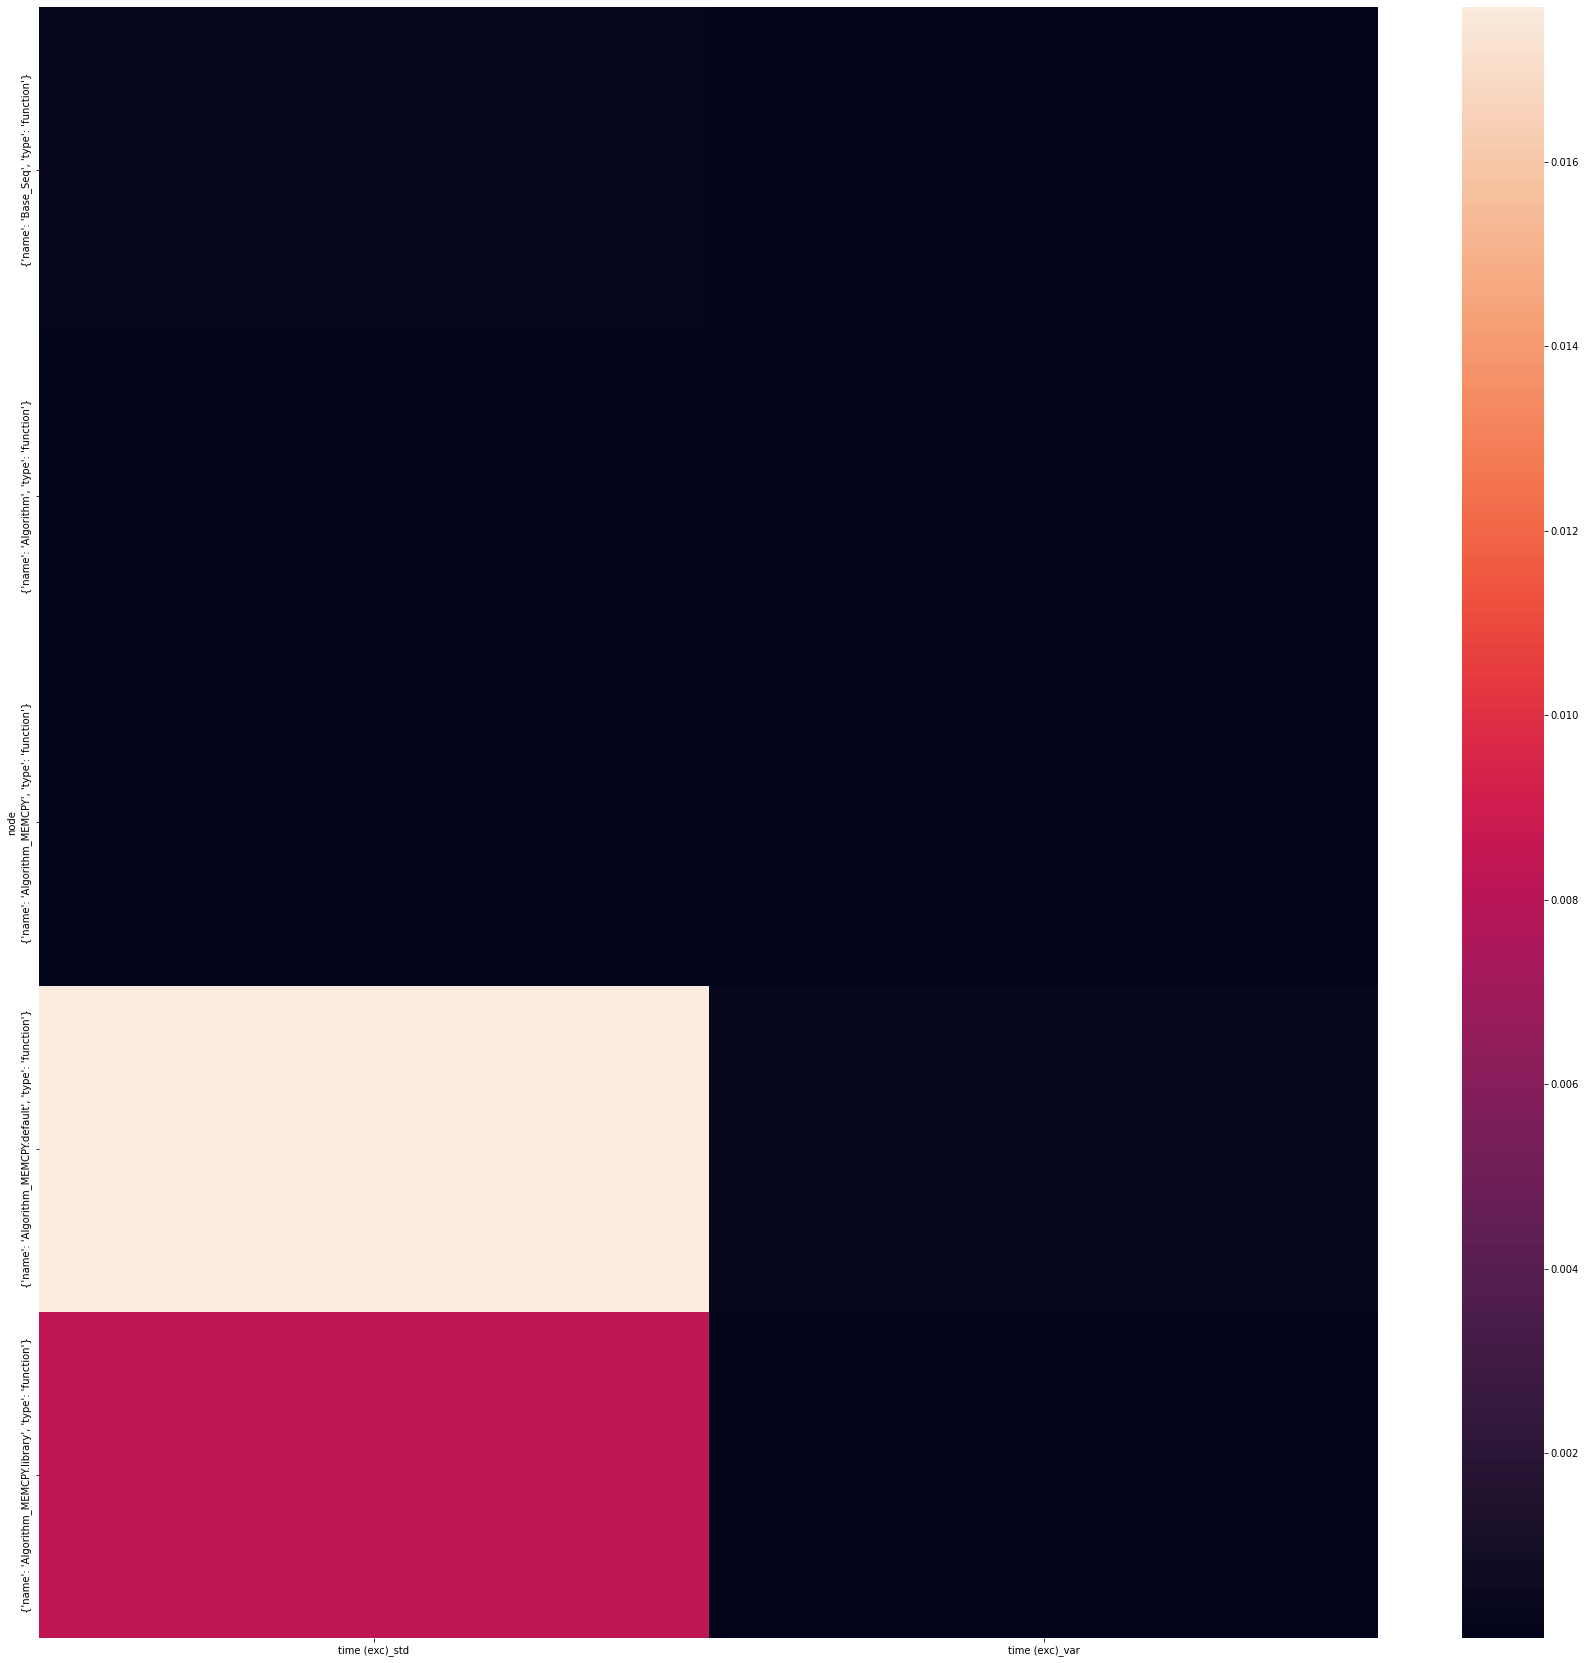

In [46]:
plt.figure(figsize=(30, 30))
metrics = ["time (exc)_std", "time (exc)_var"]
th.display_heatmap(th_stats_name, columns=metrics)

**Multi-Indexed Thicket Example**

Example will show how to pass a columnar joined thicket object. When passing a columnar joined thicket object, the columns argument will now take a list of tuples. Each tuple will consist of two elements. The first element will always be the column index, and the second element will be an associated column under the column index you passed.<br>

 - Example: (column_index, column_name) -> ("GCC", "Machine clears")

Text(0.5, 1.0, 'Clang')

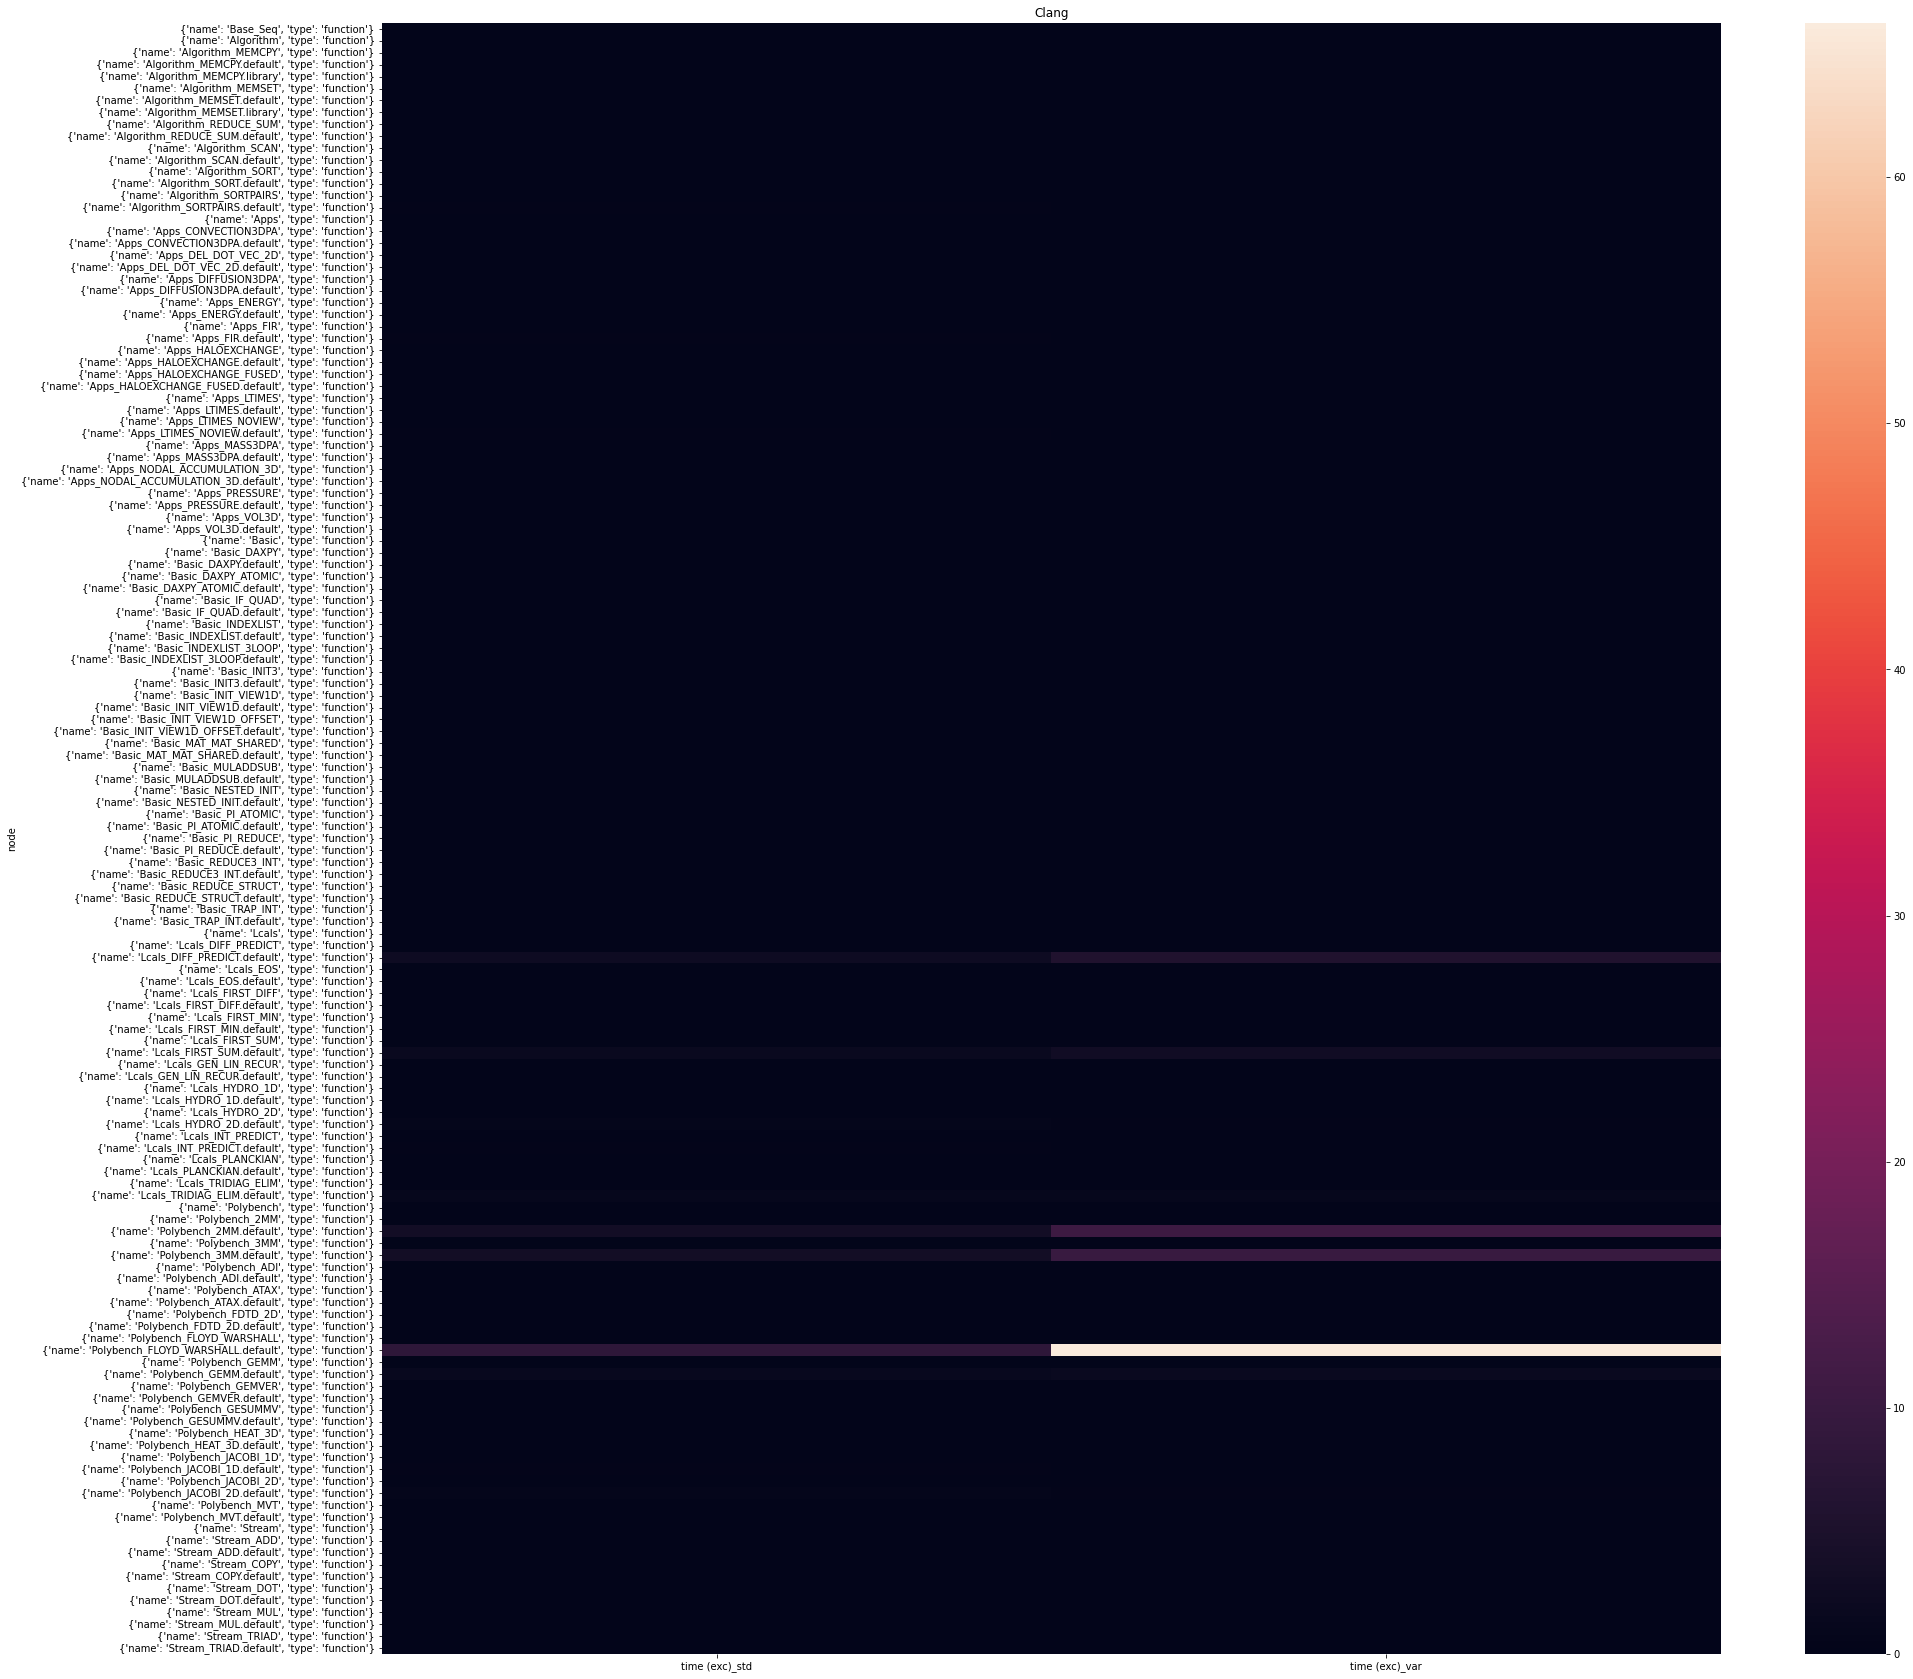

In [47]:
plt.figure(figsize=(30, 30))
metrics = [("Clang", "time (exc)_std"), ("Clang", "time (exc)_var")]
th.display_heatmap(combined_th, columns=metrics)

**Example of Not Passing the Same Column Index for Multi-Indexed Thicket**

In [48]:
#metrics = [("Clang", "time (exc)_std"), ("GCC", "Machine clears_var")]
#th.display_heatmap(combined_th, columns=metrics)

### 6.2 Displaying Histogram

The `display_histogram` function will display a histogram for a user passed node and columns. Node and column must come from the performance data table. <br>

A histogram allows for a user to see outliers and the overall distribution of their data.

In [49]:
# Getting nodes to pass
n = pd.unique(combined_th.dataframe.reset_index()["node"])[4]

**Single Index Thicket Example**

<Figure size 2160x2160 with 0 Axes>

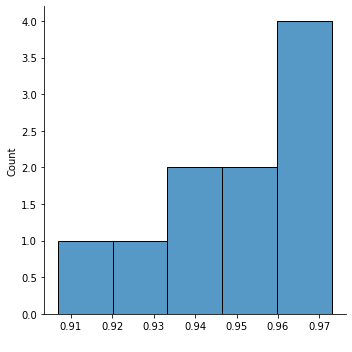

In [50]:
plt.figure(figsize=(30, 30))
th.display_histogram(clang_th, node=n, column="Machine clears")

**Multi-Indexed Thicket Example**

Example will show how to pass a columnar joined thicket object. When passing a columnar joined thicket object, the columns argument will now take a list of tuples. Each tuple will consist of two elements. The first element will always be the column index, and the second element will be an associated column under the column index you passed.<br>

 - Example: (column_index, column_name) -> ("GCC", "Machine clears")

<Figure size 2160x2160 with 0 Axes>

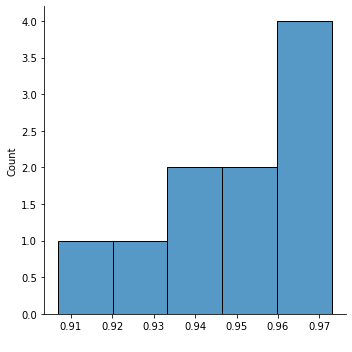

In [51]:
plt.figure(figsize=(30, 30))
th.display_histogram(combined_th, node=n, column=("Clang", "Machine clears"))

**Example of Error if Not Passing a Hatchet Node**

In [52]:
#n = "not_hatchet_node"
#th.display_histogram(combined_th, node=n, column=("Clang", "Machine clears"))

### 6.3 Displaying Boxplot

The `display_boxplot` function will display a boxplot for each passed in node(s) and column(s). The passed nodes and columns must be from the performance data table. 

In [53]:
# Getting nodes to pass
n = pd.unique(combined_th.dataframe.reset_index()["node"])[0:2].tolist()

**Single Index Thicket Example**

<Axes: xlabel='node', ylabel=' '>

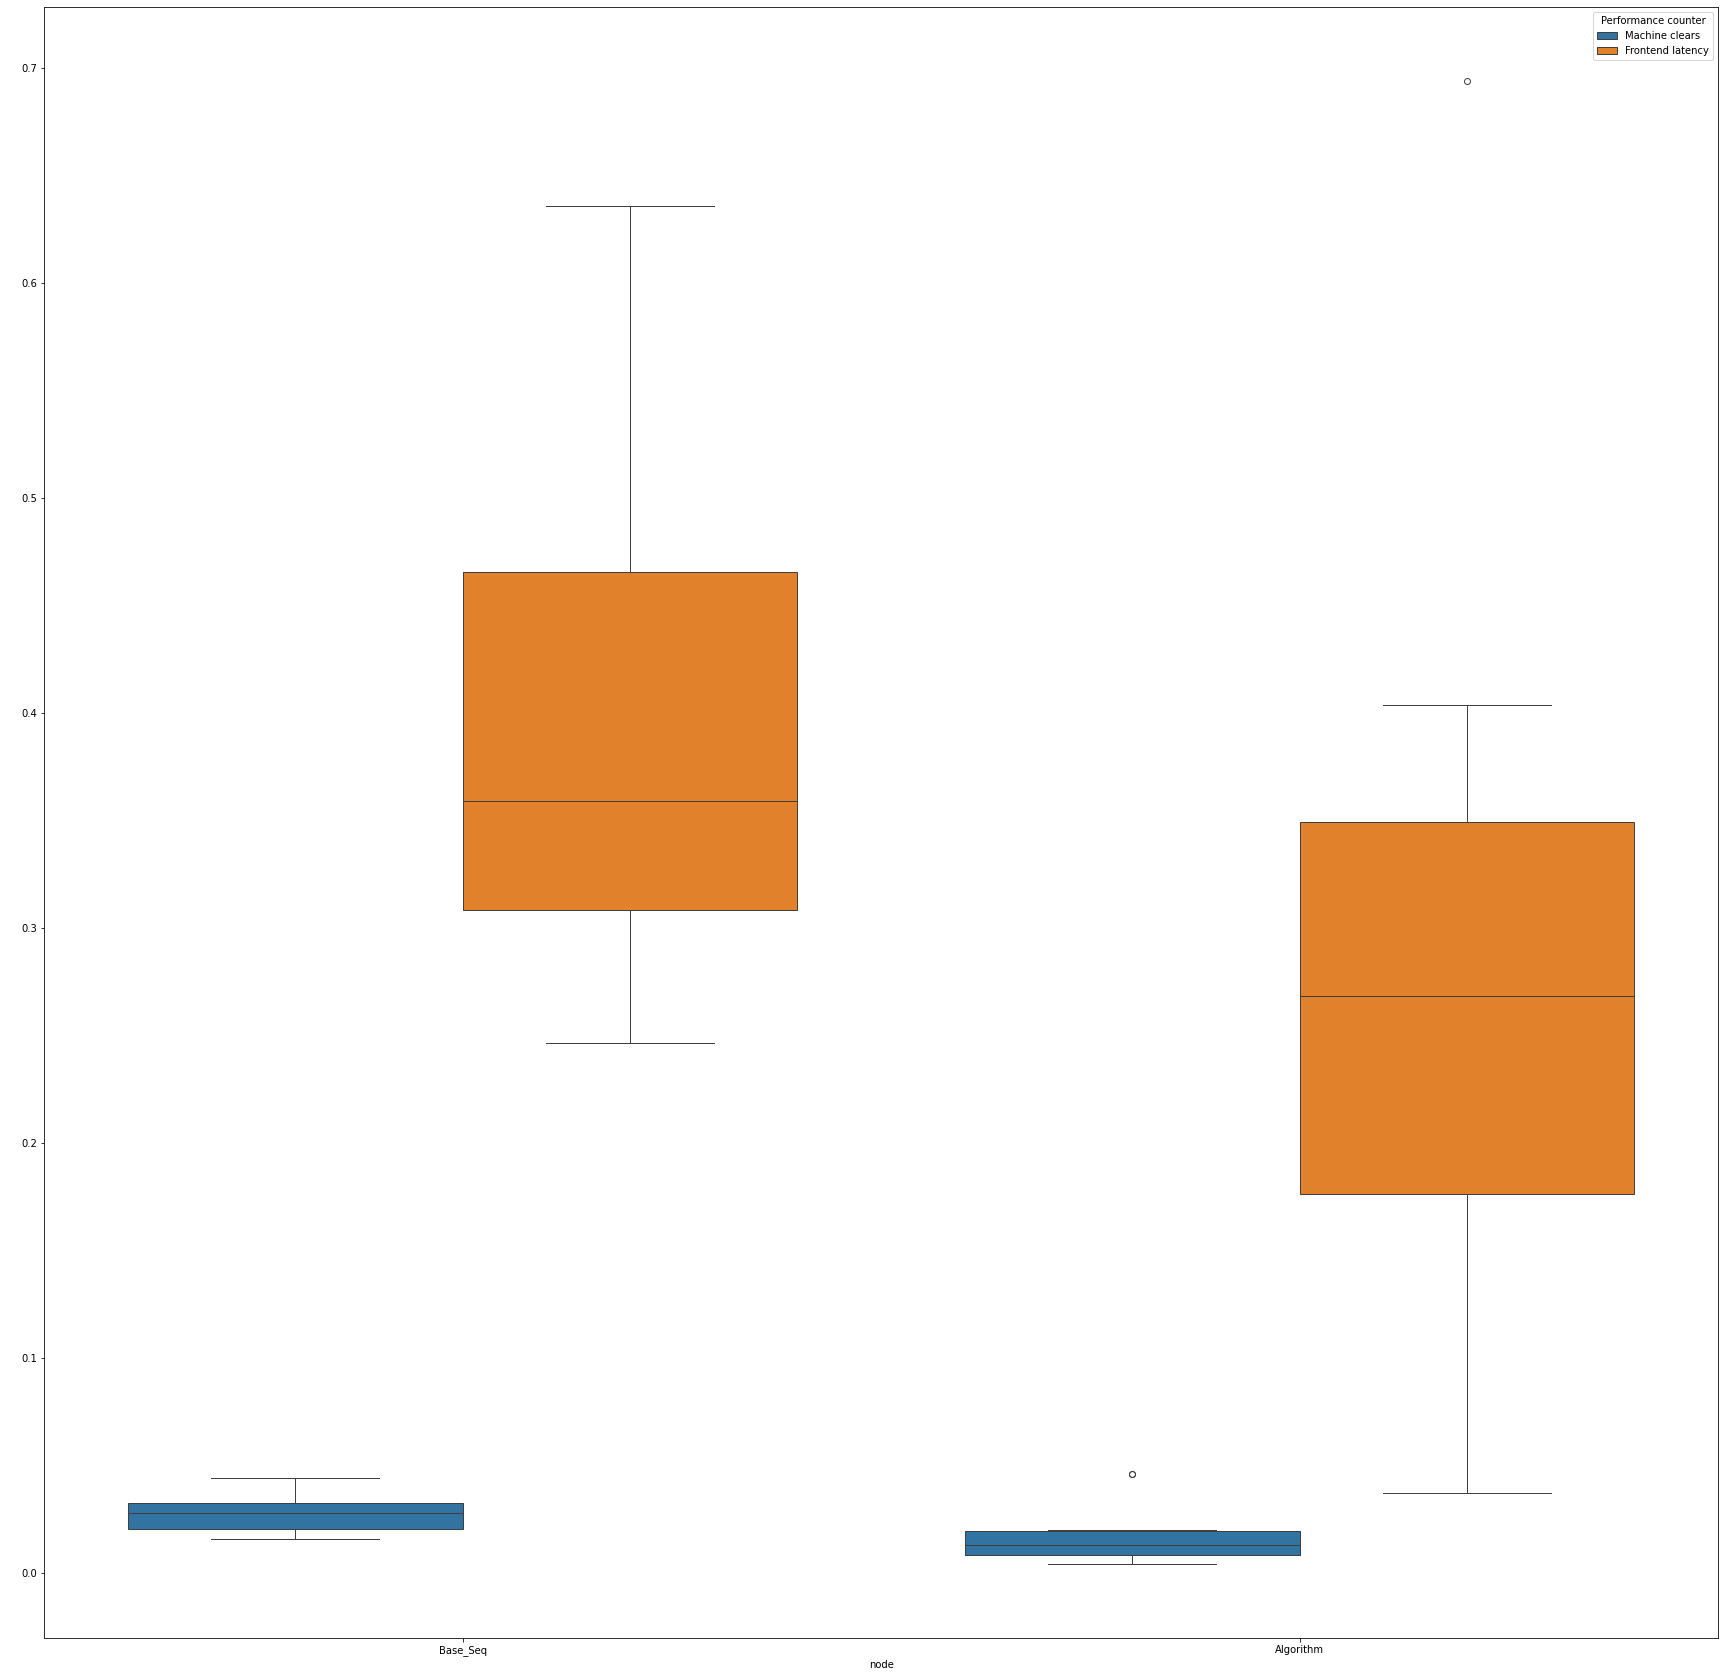

In [54]:
plt.figure(figsize=(30, 30))
th.display_boxplot(clang_th, nodes=n, columns=["Machine clears", "Frontend latency"])

**Multi-Indexed Thicket Example**

Example will show how to pass a columnar joined thicket object. When passing a columnar joined thicket object, the columns argument will now take a list of tuples. Each tuple will consist of two elements. The first element will always be the column index, and the second element will be an associated column under the column index you passed.<br>

 - Example: (column_index, column_name) -> ("GCC", "Machine clears")

<Axes: xlabel='node', ylabel=' '>

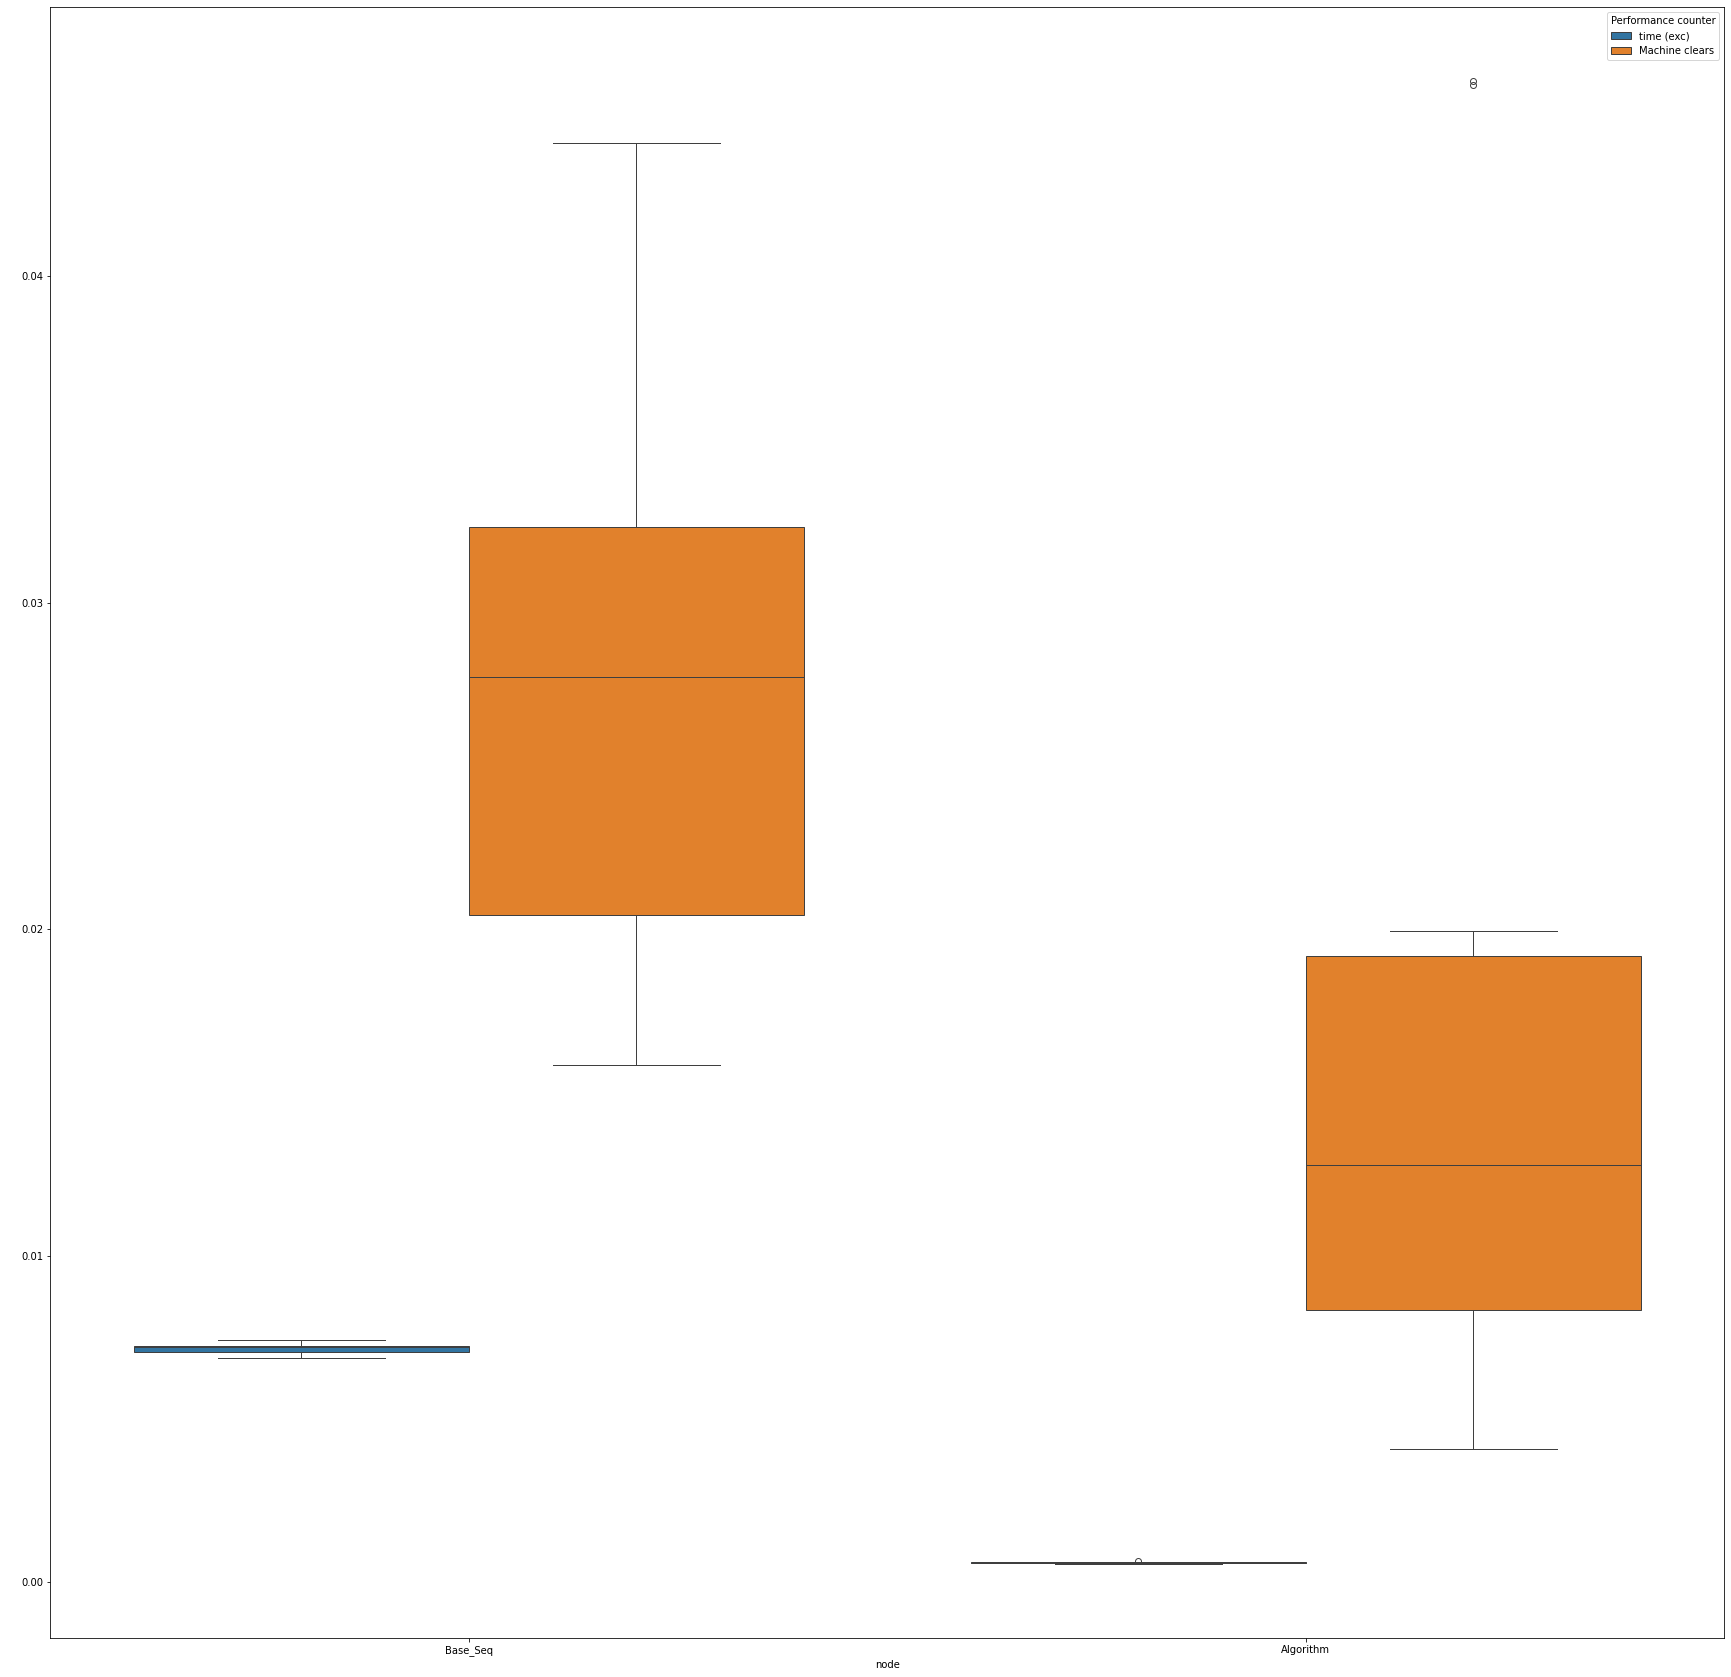

In [55]:
plt.figure(figsize=(30, 30))
th.display_boxplot(combined_th, nodes=n, columns=[("Clang", "time (exc)"), ("Clang", "Machine clears")])

**Example of Error if Not Passing Same Column Index**

In [56]:
#th.display_boxplot(combined_th, nodes=n, columns=[("Clang", "time (exc)"), ("GCC", "Machine clears")])